In [2]:
import pandas as pd
import numpy as np
import random
import math
from tqdm import tqdm

In [3]:
data = pd.read_csv('../data/room.csv')
feature_columns = [ col for col in data.columns if col not in ['id','classes']]
print(data[feature_columns].nunique())

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


In [4]:
print(feature_columns)

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [5]:
def calculate_equivalence_classes(data, condition_attrs):
    # 取出条件属性的列索引
    # 设置条件属性为索引
    # print(condition_attrs)
    data_indexed = data.set_index(condition_attrs)
    # 按照索引分组并将分组内结果合并为列表
    equivalence_classes = data_indexed.groupby(level=condition_attrs)[data.columns[0]].apply(list).to_dict()
    return equivalence_classes

In [6]:
def fitness_function(feature_columns,data,decision_attr):
    # 计算D的信息熵
    total_records = len(data)
    decision_counts = data[decision_attr].value_counts()
    decision_prob = decision_counts / total_records
    entropy_D = -(decision_prob * np.log2(decision_prob)).sum()

    equivalence_classes = calculate_equivalence_classes(data,feature_columns)
    equivalence_classes_dec = calculate_equivalence_classes(data, decision_attr)

    rule_confidences =0
    entropy_DB = 0
    count=0

    for equivalence_class in equivalence_classes.values():
           class_size = len(equivalence_class)
           max=0
           for key_decision in equivalence_classes_dec.keys():
               x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
               if len(x) / class_size >max:
                   max=len(x)/class_size
           y=1-max
           rule_confidences=rule_confidences+y
           count=count+1

    for equivalence_class in equivalence_classes.values():
        class_size = len(equivalence_class)
        class_prob = class_size / total_records
        for key_decision in equivalence_classes_dec.keys():
            x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
            if (len(x)>0):
                decision_prob = len(x) / class_size
                entropy_DB -= class_prob * decision_prob * math.log(decision_prob, 2)
    print(entropy_D-entropy_DB)
    avg_confidence = rule_confidences / count+0*(entropy_D-entropy_DB)
    return avg_confidence

In [7]:
feature_columns1=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color']
feature_columns2=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number']
feature_columns3=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type']
feature_columns4=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring']
feature_columns5=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring']
feature_columns6=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape']
feature_columns7=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size']
feature_columns8=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment']
feature_columns9=['cap-shape', 'cap-surface', 'cap-color', 'bruises']
feature_columns10=['cap-shape', 'cap-surface']

print(fitness_function(feature_columns10,data,'classes'))

0.08946675158512662
0.1813979357531019


In [13]:

a=[0. , 0.1 ,0.2, 0.3, 0.4, 0.5 ,0.6 ,0.7 ,0.8, 0.9 ,1. ]
b=[]
x=0.1813979357531019
y=0.08946675158512662
for i in a:
    b.append(x + i * y)
print(b)

[0.1813979357531019, 0.19034461091161456, 0.19929128607012722, 0.20823796122863988, 0.21718463638715255, 0.2261313115456652, 0.23507798670417787, 0.24402466186269053, 0.2529713370212032, 0.2619180121797159, 0.27086468733822855]


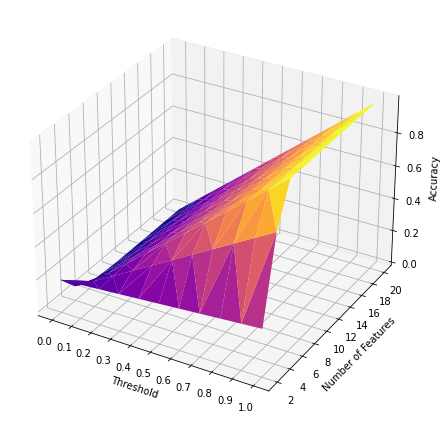

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y = [2,4,6,8,10,12,14,16,18,20]
X, Y = np.meshgrid(x, y)
data=np.array([
    [0.1813979357531019, 0.19034461091161456, 0.19929128607012722, 0.20823796122863988, 0.21718463638715255, 0.2261313115456652, 0.23507798670417787, 0.24402466186269053, 0.2529713370212032, 0.2619180121797159, 0.27086468733822855],
    [0.06823587745471502, 0.1376940594080592, 0.2071522413614034, 0.2766104233147476, 0.3460686052680918, 0.415526787221436, 0.4849849691747802, 0.5544431511281243, 0.6239013330814686, 0.6933595150348127, 0.7628176969881569],
    [0.014515640441180123, 0.11301198111108382, 0.21150832178098752, 0.3100046624508912, 0.40850100312079496, 0.5069973437906986, 0.6054936844606023, 0.7039900251305059, 0.8024863658004098, 0.9009827064703134, 0.9994790471402171],
    [0.007202224721909762, 0.10616971349868717, 0.2051372022754646, 0.304104691052242, 0.40307217982901944, 0.5020396686057969, 0.6010071573825743, 0.6999746461593517, 0.7989421349361291, 0.8979096237129065, 0.9968771124896839],
    [0.001773049645390071, 0.1013837192168798, 0.20099438878836953, 0.30060505835985923, 0.40021572793134896, 0.4998263975028387, 0.5994370670743284, 0.6990477366458181, 0.7986584062173079, 0.8982690757887977, 0.9978797453602873],
    [0.0012165450121654502, 0.10102418614588587, 0.2008318272796063, 0.3006394684133267, 0.40044710954704715, 0.5002547506807676, 0.6000623918144881, 0.6998700329482085, 0.7996776740819289, 0.8994853152156493, 0.9992929563493698],
    [0.0006858710562414266, 0.10049351218996186, 0.20030115332368228, 0.3001087944574027, 0.3999164355911231, 0.49972407672484354, 0.599531717858564, 0.6993393589922844, 0.7991470001260048, 0.8989546412597252, 0.9987622823934457],
    [0.0004344048653344917, 0.10024204599905492, 0.20004968713277535, 0.29985732826649575, 0.3996649694002162, 0.4994726105339366, 0.5992802516676571, 0.6990878928013775, 0.7988955339350979, 0.8987031750688184, 0.9985108162025388],
    [0.0004344048653344917, 0.10024204599905492, 0.20004968713277535, 0.29985732826649575, 0.3996649694002162, 0.4994726105339366, 0.5992802516676571, 0.6990878928013775, 0.7988955339350979, 0.8987031750688184, 0.9985108162025388],
    [0.0, 0.09990612691483579, 0.19981225382967158, 0.29971838074450735, 0.39962450765934315, 0.4995306345741789, 0.5994367614890147, 0.6993428884038504, 0.7992490153186863, 0.899155142233522, 0.9990612691483578]
])

fig = plt.figure(figsize=(6,6))  # Set the size of the figure in inches
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), data.flatten(), cmap='plasma')

# Set the axis labels
ax.set_xlabel('Threshold')
ax.set_ylabel('Number of Features')
ax.set_zlabel('Accuracy')

# Customize the tick labels
x_ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y_ticks = [2,4,6,8,10,12,14,16,18,20]

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Save the plot in IEEE format
plt.tight_layout()
plt.savefig('test2.png', bbox_inches='tight',dpi=300)

# Show the plot in the console
plt.show()

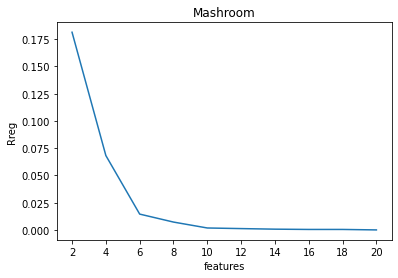

In [10]:
import numpy as np
import matplotlib.pyplot as plt
data1=[1.81397936e-01, 6.82358775e-02, 1.45156404e-02, 7.20222472e-03,
        1.77304965e-03, 1.21654501e-03, 6.85871056e-04, 4.34404865e-04,
        4.34404865e-04, 0.00000000e+00]
data2 =[1.90344611e-01, 1.37694059e-01, 1.13011981e-01, 1.06169713e-01,
        1.01383719e-01, 1.01024186e-01, 1.00493512e-01, 1.00242046e-01,
        1.00242046e-01, 9.99061269e-02]
data3=[0.19929128607012722,0.2071522413614034,0.21150832178098752,0.2051372022754646,0.20099438878836953, 0.2008318272796063,0.20030115332368228,0.20004968713277535,0.20004968713277535,0.29971838074450735]
data4=  [2.08237961e-01, 2.76610423e-01, 3.10004662e-01, 3.04104691e-01,
        3.00605058e-01, 3.00639468e-01, 3.00108794e-01, 2.99857328e-01,
        2.99857328e-01, 2.99718381e-01]
data5=       [2.17184636e-01, 3.46068605e-01, 4.08501003e-01, 4.03072180e-01,
        4.00215728e-01, 4.00447110e-01, 3.99916436e-01, 3.99664969e-01,
        3.99664969e-01, 3.99624508e-01]
data6=       [2.26131312e-01, 4.15526787e-01, 5.06997344e-01, 5.02039669e-01,
        4.99826398e-01, 5.00254751e-01, 4.99724077e-01, 4.99472611e-01,
        4.99472611e-01, 4.99530635e-01]

data11=[2.70864687e-01, 7.62817697e-01, 9.99479047e-01, 9.96877112e-01,
        9.97879745e-01, 9.99292956e-01, 9.98762282e-01, 9.98510816e-01,
        9.98510816e-01, 9.99061269e-01]
x_data = np.arange(2, 21, 2)

plt.plot(x_data, data1)
plt.xlabel('features')
plt.ylabel('Rreg')
plt.title('Mashroom')

plt.xticks(x_data)

xticklabels = [str(x) for x in x_data]
plt.gca().set_xticklabels(xticklabels)

plt.show()

In [11]:
data=np.array([
    [0.1813979357531019, 0.19034461091161456, 0.19929128607012722, 0.20823796122863988, 0.21718463638715255, 0.2261313115456652, 0.23507798670417787, 0.24402466186269053, 0.2529713370212032, 0.2619180121797159, 0.27086468733822855],
    [0.06823587745471502, 0.1376940594080592, 0.2071522413614034, 0.2766104233147476, 0.3460686052680918, 0.415526787221436, 0.4849849691747802, 0.5544431511281243, 0.6239013330814686, 0.6933595150348127, 0.7628176969881569],
    [0.014515640441180123, 0.11301198111108382, 0.21150832178098752, 0.3100046624508912, 0.40850100312079496, 0.5069973437906986, 0.6054936844606023, 0.7039900251305059, 0.8024863658004098, 0.9009827064703134, 0.9994790471402171],
    [0.007202224721909762, 0.10616971349868717, 0.2051372022754646, 0.304104691052242, 0.40307217982901944, 0.5020396686057969, 0.6010071573825743, 0.6999746461593517, 0.7989421349361291, 0.8979096237129065, 0.9968771124896839],
    [0.001773049645390071, 0.1013837192168798, 0.20099438878836953, 0.30060505835985923, 0.40021572793134896, 0.4998263975028387, 0.5994370670743284, 0.6990477366458181, 0.7986584062173079, 0.8982690757887977, 0.9978797453602873],
    [0.0012165450121654502, 0.10102418614588587, 0.2008318272796063, 0.3006394684133267, 0.40044710954704715, 0.5002547506807676, 0.6000623918144881, 0.6998700329482085, 0.7996776740819289, 0.8994853152156493, 0.9992929563493698],
    [0.0006858710562414266, 0.10049351218996186, 0.20030115332368228, 0.3001087944574027, 0.3999164355911231, 0.49972407672484354, 0.599531717858564, 0.6993393589922844, 0.7991470001260048, 0.8989546412597252, 0.9987622823934457],
    [0.0004344048653344917, 0.10024204599905492, 0.20004968713277535, 0.29985732826649575, 0.3996649694002162, 0.4994726105339366, 0.5992802516676571, 0.6990878928013775, 0.7988955339350979, 0.8987031750688184, 0.9985108162025388],
    [0.0004344048653344917, 0.10024204599905492, 0.20004968713277535, 0.29985732826649575, 0.3996649694002162, 0.4994726105339366, 0.5992802516676571, 0.6990878928013775, 0.7988955339350979, 0.8987031750688184, 0.9985108162025388],
    [0.0, 0.09990612691483579, 0.19981225382967158, 0.29971838074450735, 0.39962450765934315, 0.4995306345741789, 0.5994367614890147, 0.6993428884038504, 0.7992490153186863, 0.899155142233522, 0.9990612691483578]
])

a_trans = data.transpose()


In [12]:
a_trans


array([[1.81397936e-01, 6.82358775e-02, 1.45156404e-02, 7.20222472e-03,
        1.77304965e-03, 1.21654501e-03, 6.85871056e-04, 4.34404865e-04,
        4.34404865e-04, 0.00000000e+00],
       [1.90344611e-01, 1.37694059e-01, 1.13011981e-01, 1.06169713e-01,
        1.01383719e-01, 1.01024186e-01, 1.00493512e-01, 1.00242046e-01,
        1.00242046e-01, 9.99061269e-02],
       [1.99291286e-01, 2.07152241e-01, 2.11508322e-01, 2.05137202e-01,
        2.00994389e-01, 2.00831827e-01, 2.00301153e-01, 2.00049687e-01,
        2.00049687e-01, 1.99812254e-01],
       [2.08237961e-01, 2.76610423e-01, 3.10004662e-01, 3.04104691e-01,
        3.00605058e-01, 3.00639468e-01, 3.00108794e-01, 2.99857328e-01,
        2.99857328e-01, 2.99718381e-01],
       [2.17184636e-01, 3.46068605e-01, 4.08501003e-01, 4.03072180e-01,
        4.00215728e-01, 4.00447110e-01, 3.99916436e-01, 3.99664969e-01,
        3.99664969e-01, 3.99624508e-01],
       [2.26131312e-01, 4.15526787e-01, 5.06997344e-01, 5.02039669e-01,
   